In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import matplotlib.pyplot as plt # plotting
import matplotlib.image as mpimg # images
import numpy as np #numpy
import tensorflow.compat.v2 as tf #use tensorflow v2 as a main 
import tensorflow.keras as keras # required for high level applications
from sklearn.model_selection import train_test_split # split for validation sets
from sklearn.preprocessing import normalize # normalization of the matrix
from scipy.signal import convolve2d # convolutionof the 2D signals

tf.version.VERSION

'1.15.0'

In [0]:
def show_history(history):
    plt.figure()
    for key in history.history.keys():
        plt.plot(history.epoch, history.history[key], label=key)
    plt.legend()
    plt.tight_layout()


In [6]:
# mnist is the basic dataset with handwritten digits
dataset = tf.keras.datasets.fashion_mnist

# data from any dataset are loaded using the load_Data function
(train_x, train_y), (test_x, test_y) = dataset.load_data()

train_x, test_x = train_x/255.0, test_x/255.0

train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, test_size=0.2, random_state=42)

# the data are in the form of 28x28 pixes with values 0-255.
print('Train data shape: ', train_x.shape, train_y.shape)
print('Validation data shape: ', valid_x.shape, valid_y.shape)
print('Test data shape:  ', test_x.shape, test_y.shape)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boo']
class_count = len(class_names)
print('Class count:', class_count, class_names)

train_x = train_x.reshape((train_x.shape[0], 28, 28, 1))
valid_x = valid_x.reshape((valid_x.shape[0], 28, 28, 1))
test_x = test_x.reshape((test_x.shape[0], 28, 28, 1))

Train data shape:  (48000, 28, 28) (48000,)
Validation data shape:  (12000, 28, 28) (12000,)
Test data shape:   (10000, 28, 28) (10000,)
Class count: 10 ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boo']


#### Definition of the model
The base model is defined as *Sequential* with three layers, similarly to the previous lecture.

Summarization of the model and compilation is done similarly as well.

In [7]:
model = keras.Sequential([
    keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(class_count)
])

model.summary()

model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 13, 13, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 32)          9248      
_________________________________________

#### Fit the model for defined number of epochs.
Show the history of learning, evaluate the efficiency of the model.

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 12s 255us/sample - loss: 0.4281 - acc: 0.8452 - val_loss: 0.3154 - val_acc: 0.8857
Epoch 2/10
48000/48000 [==============================] - 6s 125us/sample - loss: 0.2897 - acc: 0.8946 - val_loss: 0.2893 - val_acc: 0.8948
Epoch 3/10
48000/48000 [==============================] - 6s 124us/sample - loss: 0.2569 - acc: 0.9068 - val_loss: 0.2574 - val_acc: 0.9037
Epoch 4/10
48000/48000 [==============================] - 6s 126us/sample - loss: 0.2294 - acc: 0.9149 - val_loss: 0.3144 - val_acc: 0.8882
Epoch 5/10
48000/48000 [==============================] - 6s 125us/sample - loss: 0.2107 - acc: 0.9210 - val_loss: 0.2383 - val_acc: 0.9123
Epoch 6/10
48000/48000 [==============================] - 6s 124us/sample - loss: 0.1917 - acc: 0.9274 - val_loss: 0.2268 - val_acc: 0.9188
Epoch 7/10
48000/48000 [==============================] - 6s 129us/sample - loss: 0.1791 - acc: 0.9324 - val_

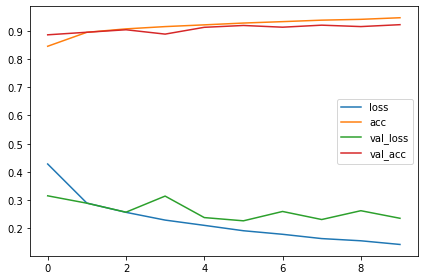

In [8]:
history = model.fit(train_x, train_y, validation_data=(valid_x, valid_y), epochs=10)

show_history(history)

test_loss, test_acc = model.evaluate(test_x, test_y)
print('Test accuracy: ', test_acc)

#### Vizualization of the confusion matrix.

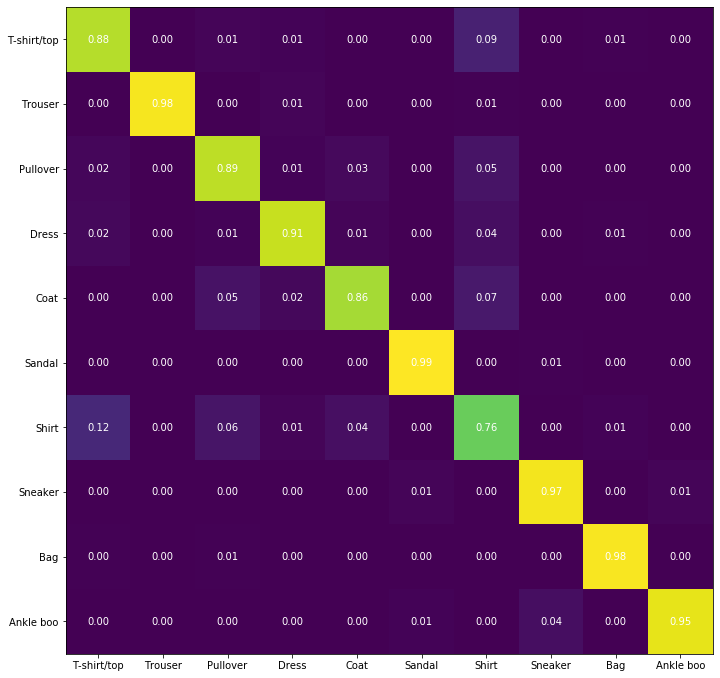

In [11]:
predictions = model.predict(test_x)
conf_matrix = np.zeros((class_count, class_count))
for idx, pred in enumerate(predictions):
    row = test_y[idx]
    col = np.argmax(pred)
    conf_matrix[row, col] += 1


# print(conf_matrix)
conf_matrix = normalize(conf_matrix, axis=1, norm='l1')
# print(conf_matrix)

plt.figure(figsize=(class_count,class_count))

plt.imshow(conf_matrix)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        text = plt.text(j, i, "{:.2f}".format(conf_matrix[i, j]), ha="center", va="center", color="w")

plt.xticks(range(class_count), class_names)
plt.yticks(range(class_count), class_names)

plt.tight_layout()
plt.show()     

In [0]:
augModel = keras.Sequential([
    keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(class_count)
])

#model.summary()

augModel.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])

datagen = keras.preprocessing.image.ImageDataGenerator(#zoom_range=0.2,
                                                       #rotation_range=45,
                                                       featurewise_center=True,
                                                       #featurewise_std_normalization=True,
                                                       horizontal_flip=True,
                                                       vertical_flip=True
                                                       )

batchSize=32
augHistory = augModel.fit_generator(datagen.flow(train_x, train_y, batch_size=batchSize),
                                    steps_per_epoch=(len(train_x) / batchSize),
                                    validation_data=(valid_x, valid_y),
                                    epochs=10)

show_history(augHistory)

test_loss, test_acc = augModel.evaluate(test_x, test_y)
print('Test accuracy: ', test_acc)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
  30/1500 [..............................] - ETA: 53s - loss: 1.6880 - acc: 0.4083 

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


1500/1500 [==============================] - 10s 7ms/step - loss: 0.6028 - acc: 0.7803 - val_loss: 0.5332 - val_acc: 0.7796
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4128 - acc: 0.8494 - val_loss: 0.3585 - val_acc: 0.8689
Epoch 3/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.3691 - acc: 0.8641 - val_loss: 0.4447 - val_acc: 0.8330
Epoch 4/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.3432 - acc: 0.8747 - val_loss: 0.3049 - val_acc: 0.8903
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3307 - acc: 0.8795 - val_loss: 0.3178 - val_acc: 0.8847
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3192 - acc: 0.8831 - val_loss: 0.2895 - val_acc: 0.8926
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3062 - acc: 0.8878 - val_loss: 0.3450 - val_acc: 0.8681
Epoch 8/10
1500/1500 [==============================] - 9s 6ms/step - 

Epoch 1/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.2399 - acc: 0.9124 - val_loss: 0.2912 - val_acc: 0.8949
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2325 - acc: 0.9140 - val_loss: 0.2645 - val_acc: 0.9038
Epoch 3/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.2300 - acc: 0.9158 - val_loss: 0.2607 - val_acc: 0.9092
Epoch 4/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.2227 - acc: 0.9170 - val_loss: 0.2498 - val_acc: 0.9112
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2199 - acc: 0.9201 - val_loss: 0.2412 - val_acc: 0.9150
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2138 - acc: 0.9199 - val_loss: 0.2959 - val_acc: 0.8968
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2118 - acc: 0.9222 - val_loss: 0.2689 - val_acc: 0.9051
Epoch 8/10
1500/1500 [==============================] - 8s 5ms

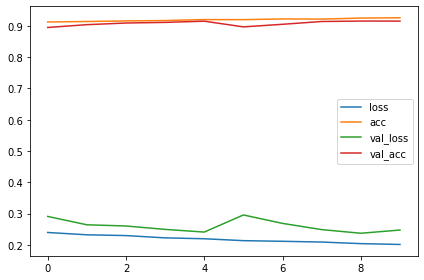

In [14]:
augHistory = augModel.fit_generator(datagen.flow(train_x, train_y, batch_size=batchSize),
                                    steps_per_epoch=(len(train_x) / batchSize),
                                    validation_data=(valid_x, valid_y),
                                    epochs=10)

show_history(augHistory)

test_loss, test_acc = augModel.evaluate(test_x, test_y)
print('Test accuracy: ', test_acc)